In [1]:
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import seaborn as sns

In [2]:
df = pd.read_csv('../AQI_Mortality_Combined.csv')

In [3]:
def seaborn_dark_setup(width=14, height=12, font_size=22):
    sns.set_style('darkgrid')
    plt.figure(figsize=(width, height))
    plt.rcParams.update({'font.size': font_size})
    
    return

<Figure size 1680x1440 with 0 Axes>

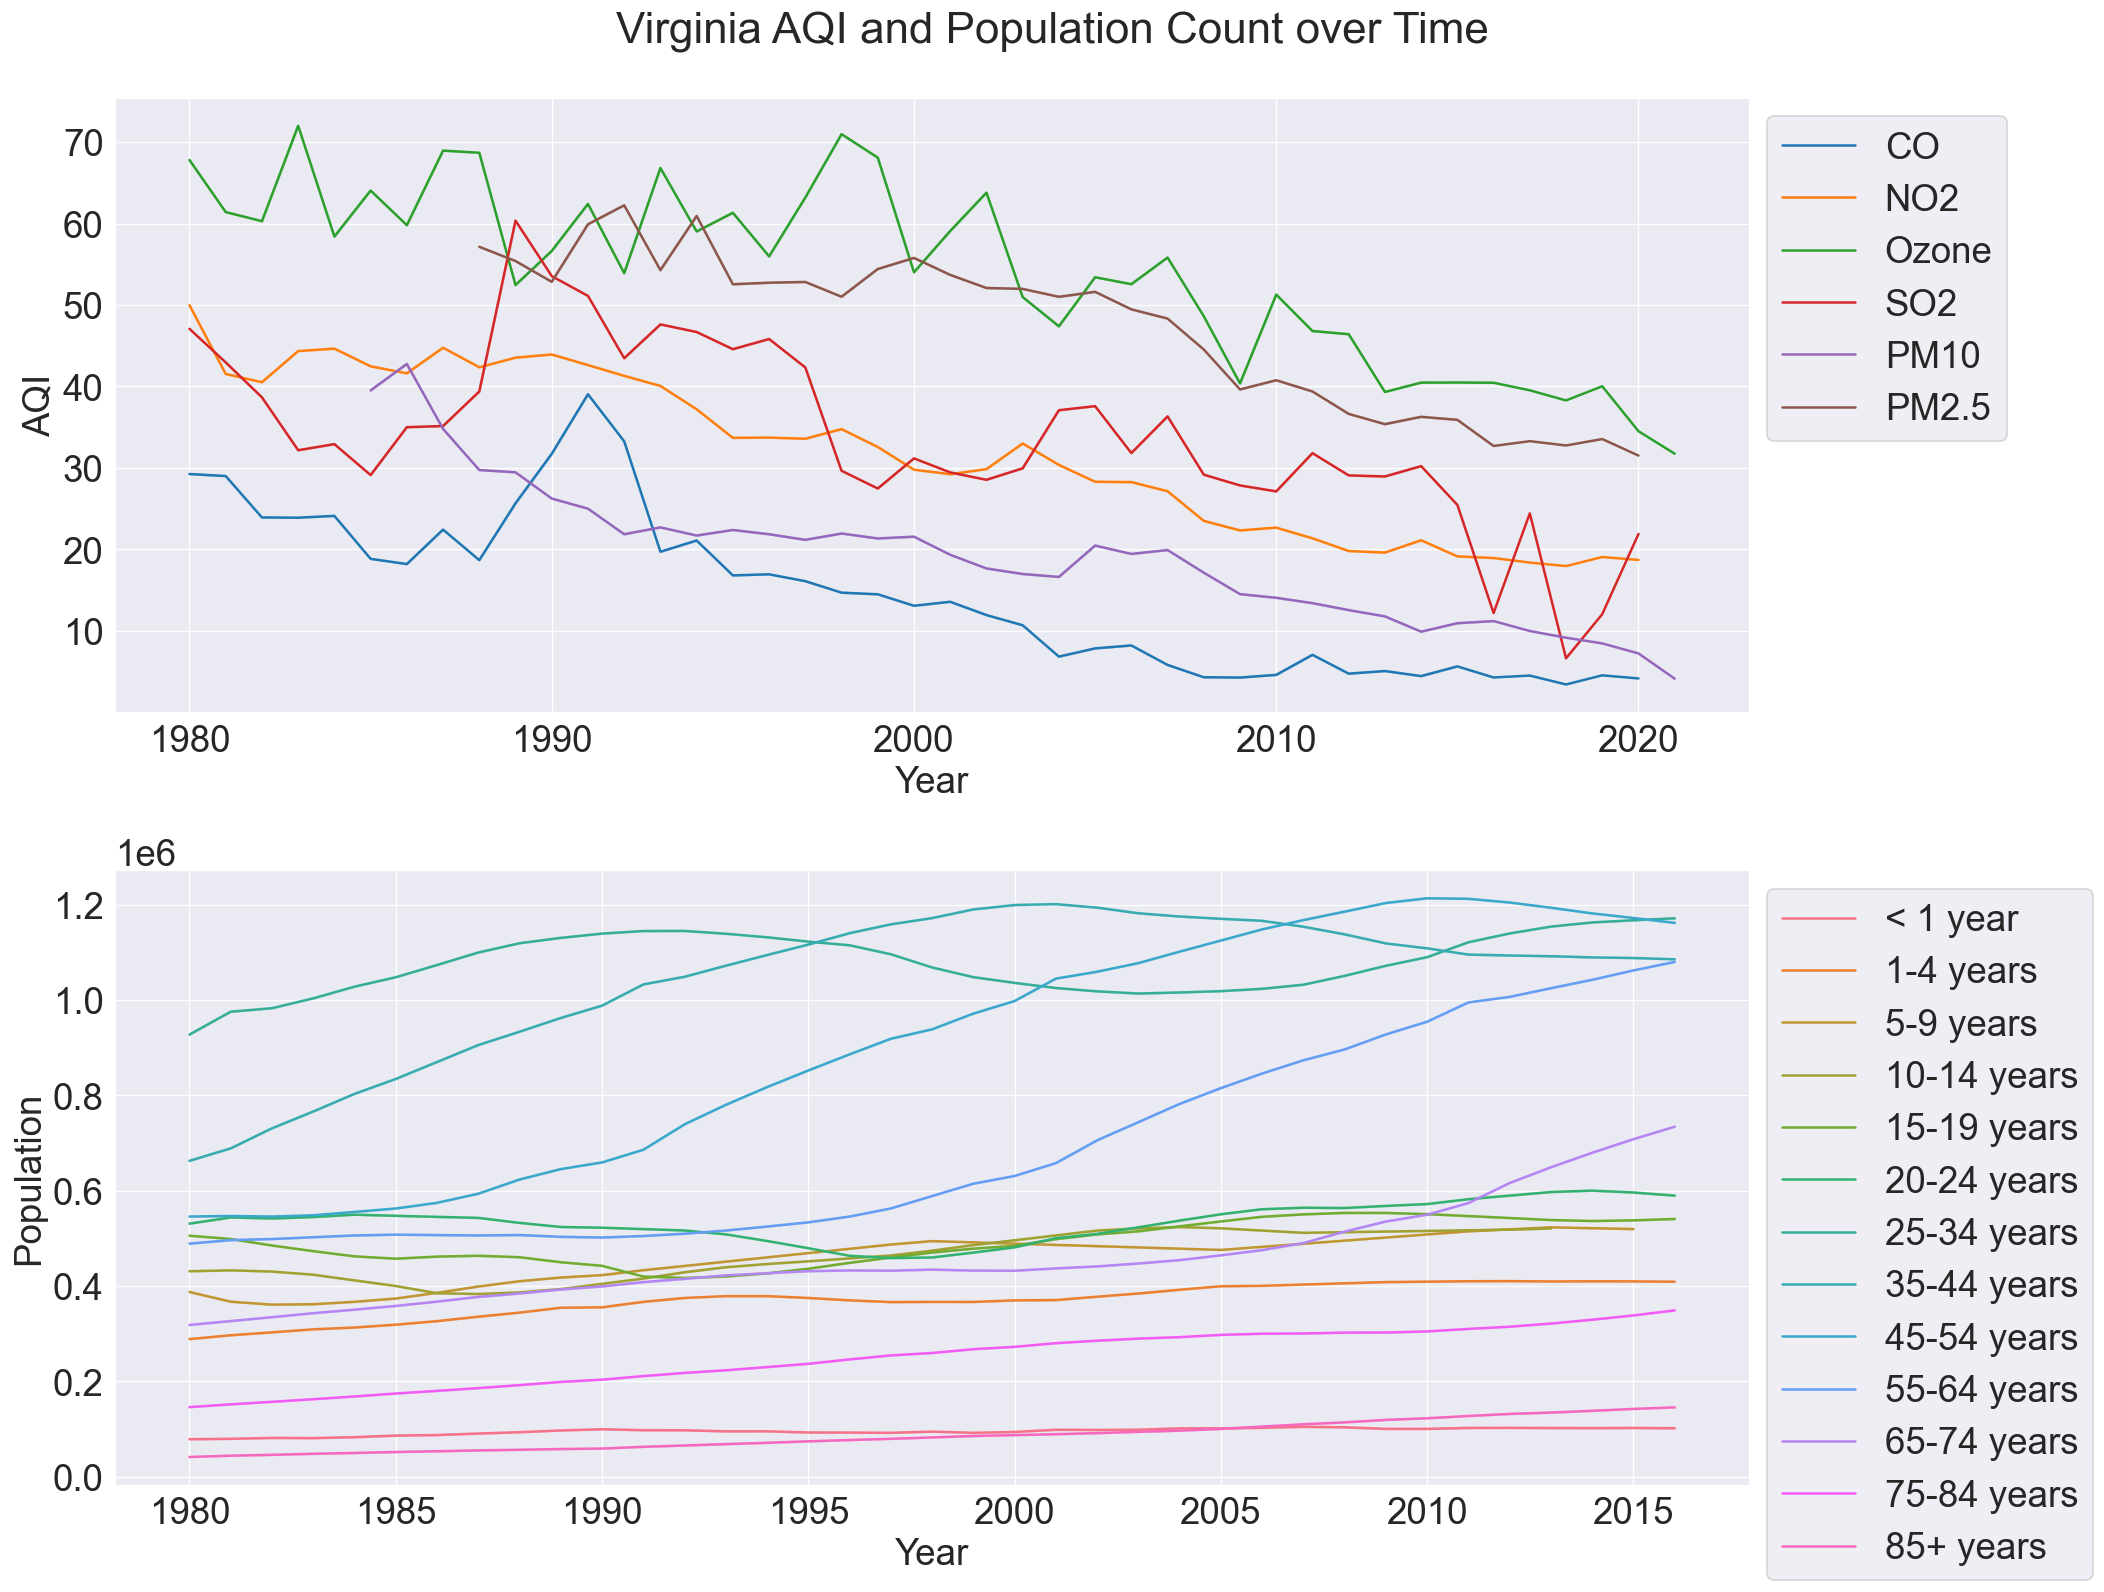

In [48]:
seaborn_dark_setup()

fig, ax = plt.subplots(2, 1, figsize=(18, 14))

sns.lineplot(x='Year',
             y='AQI', hue='Parameter',
             ax=ax[0],
             data=df[(df['State'] == 'Virginia')])

ax[0].legend(bbox_to_anchor=(1, 1))
sns.lineplot(x='Year',
             y='Population',
             ax=ax[1], hue='Age_Group',
             data=df[(df['State'] == 'Virginia')])
# ax[1].set_title('Age_Group: 1-4 years')
ax[1].legend(bbox_to_anchor=(1, 1))

plt.suptitle('Virginia AQI and Population Count over Time')

plt.tight_layout()

In [5]:
df_copy = df.copy()
df_copy = df_copy[(df_copy['State'] == 'Virginia') &
                  (df_copy['Parameter'] == 'Ozone')][['Year', 
#                                                       'State', 
#                                                       'Parameter', 
                                                      'AQI']].drop_duplicates().reset_index(drop=True)
df_copy = df_copy.set_index('Year')

## Look for Difference (d) Parameter

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_copy.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.189238
p-value: 0.971651


p-value from anderson-fuller test is > 0.05 = need for some differencing

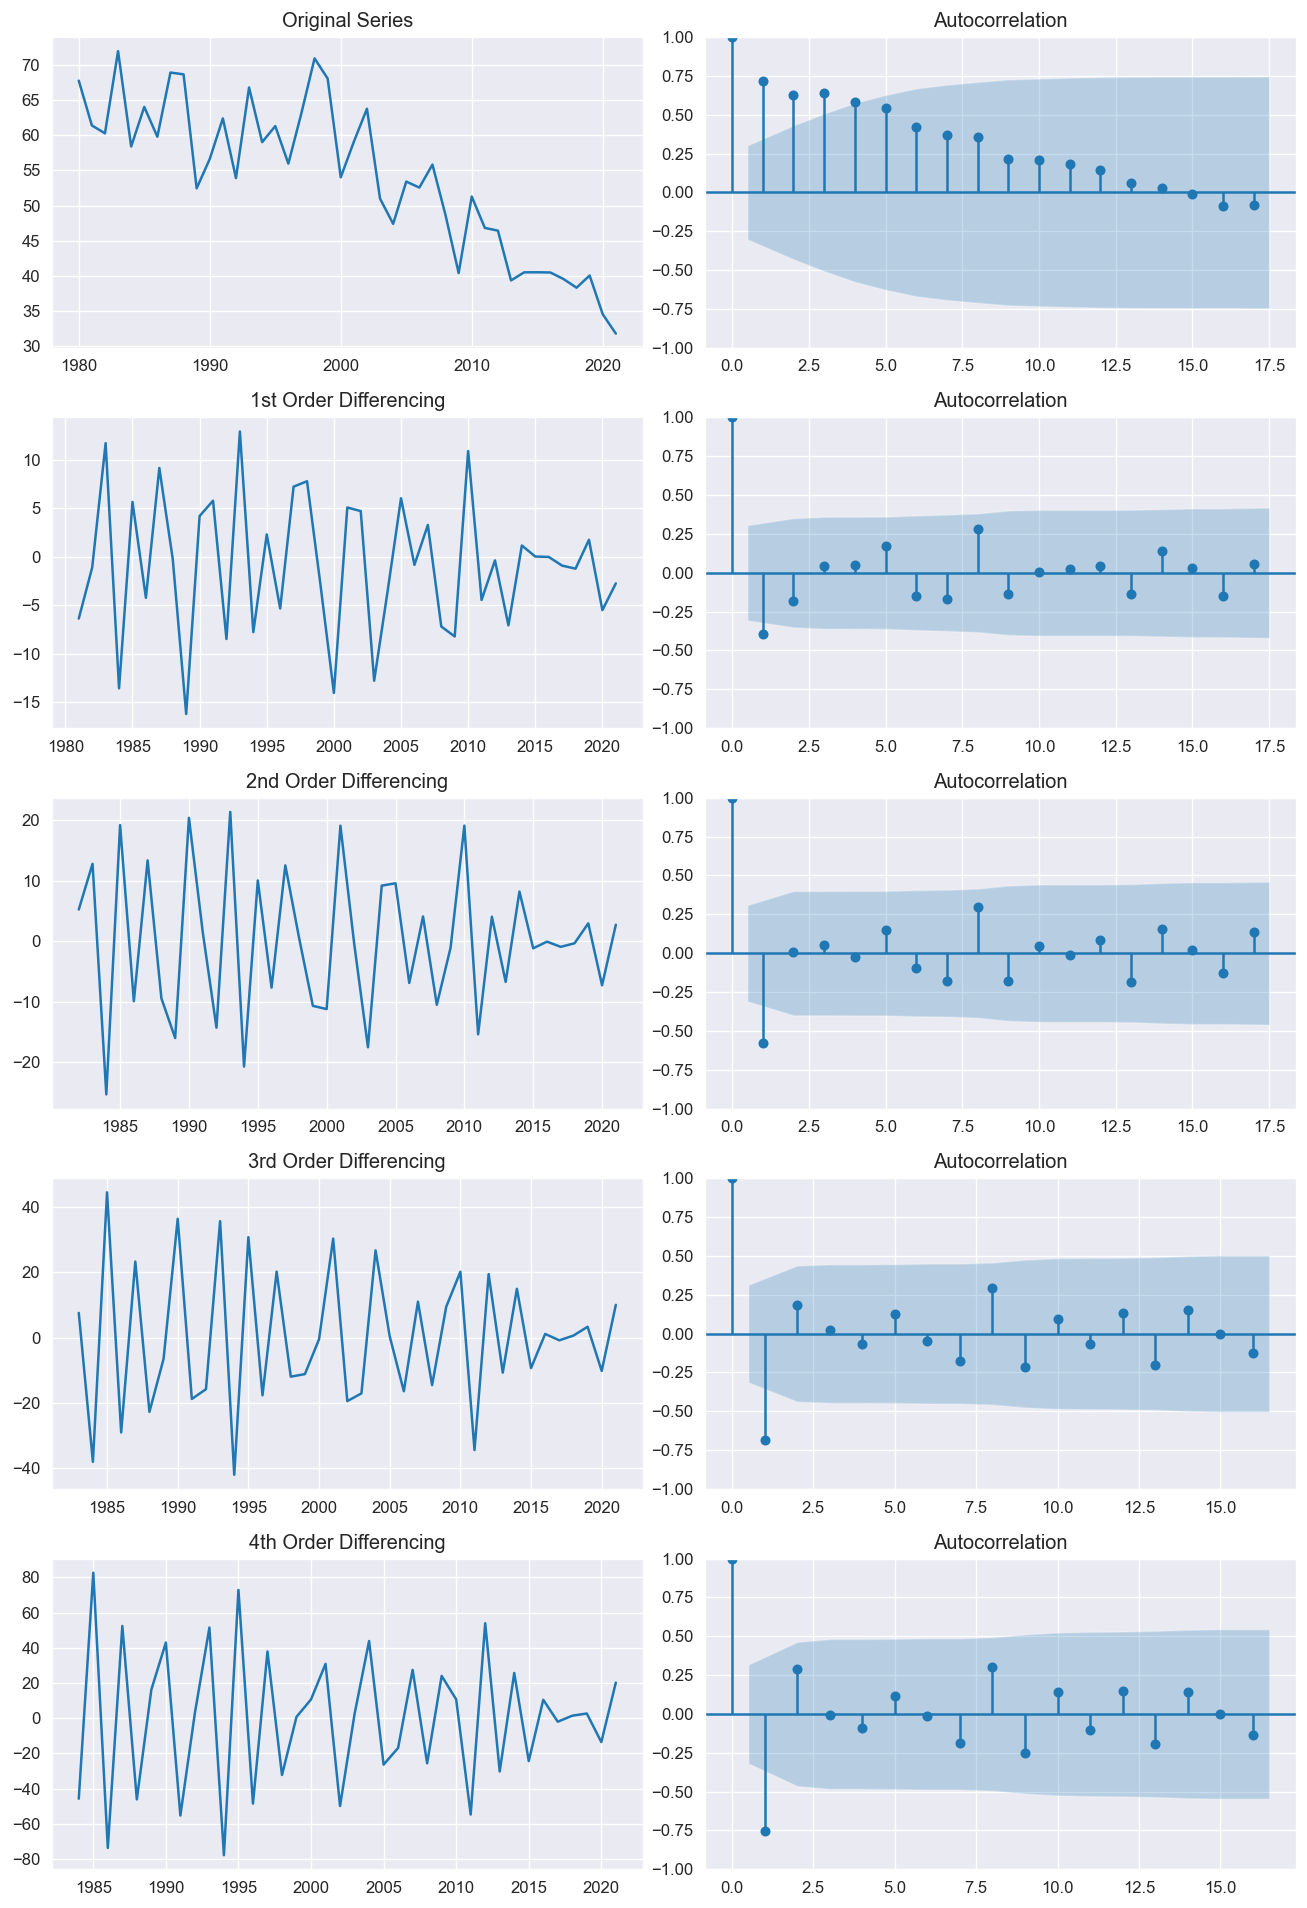

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(11,16), 'figure.dpi':120})
plt.rcParams.update({'font.size': 10})

# Import data
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(5, 2, sharex=False)
axes[0, 0].plot(df_copy['AQI']); axes[0, 0].set_title('Original Series')
plot_acf(df_copy['AQI'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_copy['AQI'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_copy['AQI'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_copy['AQI'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_copy['AQI'].diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df_copy['AQI'].diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df_copy['AQI'].diff().diff().diff().dropna(), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(df_copy['AQI'].diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df_copy['AQI'].diff().diff().diff().diff().dropna(), ax=axes[4, 1])

plt.tight_layout()
# plt.show()

## Looking for Partical Auto-Regressive (p) Parameter

c:\users\jonat\documents\cse_6242_group_project\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


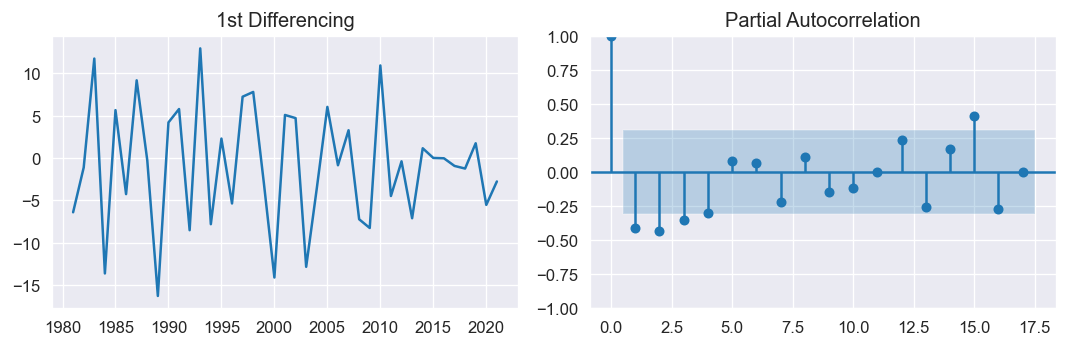

In [38]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_copy['AQI'].diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
plot_pacf(df_copy['AQI'].diff().dropna(), ax=axes[1])

plt.tight_layout()
# plt.show()

## Finding Moving Average (q) Parameter

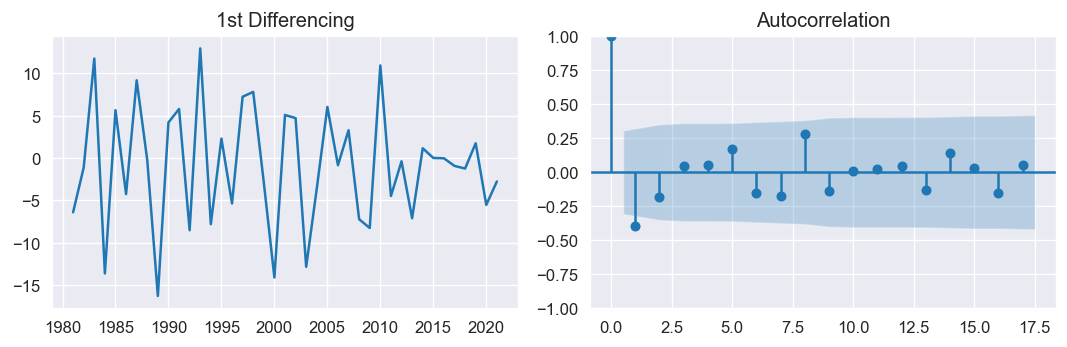

In [41]:
fig, axes = plt.subplots(1, 2, sharex=False)
axes[0].plot(df_copy['AQI'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_copy['AQI'].diff().dropna(), ax=axes[1])

plt.tight_layout()

## Automatically Carry Out the ARIMA Parameter Search

In [42]:
model = pm.auto_arima(df['AQI'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=657230.608, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1000714.946, Time=0.86 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=657381.608, Time=0.98 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=890791.014, Time=5.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=657231.199, Time=2.72 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=657230.394, Time=3.81 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=819482.459, Time=13.89 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=657234.589, Time=8.37 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=657225.188, Time=5.45 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=774136.593, Time=22.23 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=657221.278, Time=4.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=656799.036, Time=60.65 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=656810.737, Time=54.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=652888.375, Time=124.62 se

## Display Output for a Test ARIMA Model

In [44]:
model = ARIMA(df['AQI'], order=(2,0,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                95569
Model:                 ARIMA(2, 0, 3)   Log Likelihood             -326374.341
Date:                Fri, 05 Nov 2021   AIC                         652762.682
Time:                        14:04:35   BIC                         652828.955
Sample:                             0   HQIC                        652782.835
                              - 95569                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8511      0.216    194.095      0.000      41.428      42.274
ar.L1          1.6450      0.018     90.325      0.000       1.609       1.681
ar.L2         -0.6842      0.016    -41.791      0.0

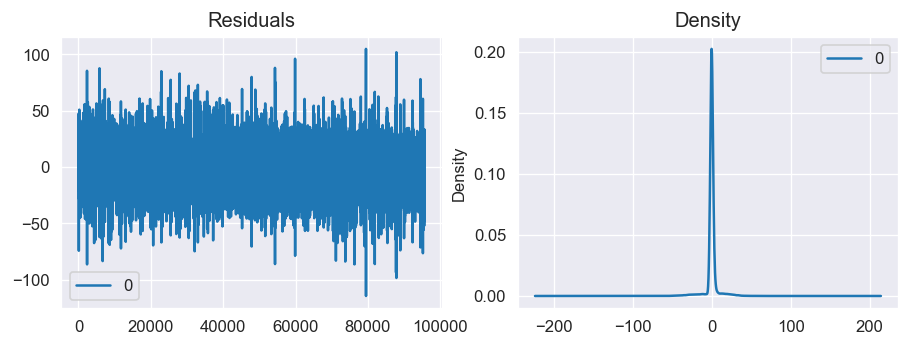

In [45]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [46]:
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'